# PREPROCESSING SELENIU RESULTS

### LIBRARIES

In [1]:
from collections import defaultdict
from array import array
from nltk.corpus import stopwords
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import collections
from unidecode import unidecode
import seaborn as sns
import csv
from langdetect import detect
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from numpy import linalg as la
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import snowballstemmer
import time
import json
import re
import string
import spacy
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.ca.examples import sentences
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('cess_cat')
from nltk.corpus import cess_cat
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cess_cat to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_cat is already up-to-date!


### IMPORT CSVs

In [2]:
# Import all csv we have
df_mossos = pd.read_csv('new_dataset_tweets_mossos.csv', header=0)
df_mossos = df_mossos.iloc[4:]
df_mossos = df_mossos.reset_index(drop=True)
df_semgeneralitat = pd.read_csv('new_dataset_tweets_semgeneralitat.csv', header=0)
df_catinformacio = pd.read_csv('new_dataset_tweets_catinformacio.csv', sep=',', names=["UserName", "Text", "RetweetCount", "Timestamp"])
df_324cat = pd.read_csv('new_dataset_tweets_324cat.csv', sep=',', names=["UserName", "Text", "RetweetCount", "Timestamp"])

In [3]:
df_mossos.head()

,UserName,Text,RetweetCount,Timestamp
0,Mossos,"Tots els casos estan resolts, si bé algunes in...",1,2023-06-08T17:05:44.000Z
1,Mossos,Hem activat patrullatges preventius de paisà i...,1,2023-06-08T17:44:59.000Z
2,Mossos,Continuem amb el dispositiu de seguretat per ...,8,2023-06-08T14:49:00.000Z
3,Mossos,Detenim cinc homes a Miralcamp per tres robato...,11,2023-06-08T13:52:12.000Z
4,Mossos,Dos agents que estan fent un control a Montman...,19,2023-06-08T10:51:38.000Z


In [4]:
df_324cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UserName      921 non-null    object 
 1   Text          921 non-null    object 
 2   RetweetCount  851 non-null    float64
 3   Timestamp     921 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.9+ KB


In [5]:
df_semgeneralitat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserName      852 non-null    object
 1   Text          852 non-null    object
 2   RetweetCount  786 non-null    object
 3   Timestamp     852 non-null    object
dtypes: object(4)
memory usage: 26.8+ KB


In [6]:
df_catinformacio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserName      1044 non-null   object
 1   Text          1044 non-null   object
 2   RetweetCount  830 non-null    object
 3   Timestamp     1044 non-null   object
dtypes: object(4)
memory usage: 32.8+ KB


In [7]:
df_final = pd.concat([df_mossos, df_324cat, df_catinformacio])
df_final = df_final.reset_index(drop=True)

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserName      2869 non-null   object
 1   Text          2869 non-null   object
 2   RetweetCount  2576 non-null   object
 3   Timestamp     2869 non-null   object
dtypes: object(4)
memory usage: 89.8+ KB


In [9]:
# Remove duplicated tweets
df_final = df_final.drop_duplicates(subset=['Text'])
# df_mossos = df_mossos.drop_duplicates(subset=['Text'])
# df_semgeneralitat = df_semgeneralitat.drop_duplicates(subset=['Text'])
# df_catinformacio = df_catinformacio.drop_duplicates(subset=['Text'])
# df_324cat = df_324cat.drop_duplicates(subset=["Text"])

In [10]:
# Reset index after removing duplicates
df_final = df_final.reset_index(drop=True)
# df_mossos = df_mossos.reset_index()
# df_semgeneralitat = df_semgeneralitat.reset_index()
# df_catinformacio = df_catinformacio.reset_index()
# df_324cat = df_324cat.reset_index()

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserName      2538 non-null   object
 1   Text          2538 non-null   object
 2   RetweetCount  2301 non-null   object
 3   Timestamp     2538 non-null   object
dtypes: object(4)
memory usage: 79.4+ KB


In [12]:
from langdetect import detect
a = df_final['Text'].apply(detect)

In [13]:
df_final['Text'][530]

"En Jaime va desaparèixer el 27 de març a Badalona. Ajuda'ns a trobar-lo\nJaime desapareció el 27 de marzo en Badalona. Ayúdanos a encontrarlo"

[Text(0, 0, '2515'),
 Text(0, 0, '13'),
 Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '1')]

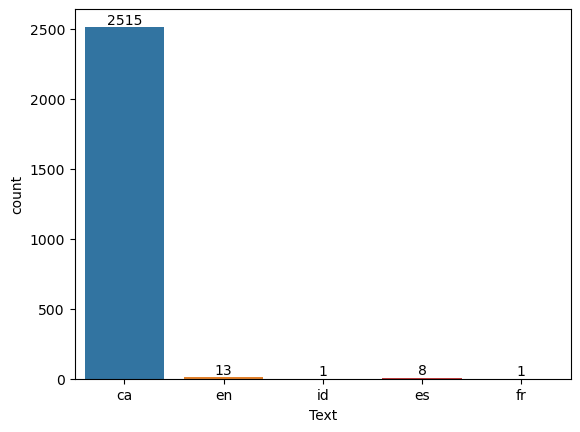

In [14]:
ax = sns.countplot(x=a)
ax.bar_label(ax.containers[0])

## CLEAN TEXT

In [15]:
# Create a function to Clean text
def cleanText(text):
    # Unidecode for removing accents
    result = unidecode(text)
    # Turn % into string "per cent"
    result1 = re.sub(r'%', ' per cent ', result)
    # Remove links
    result2 = re.sub(r'http\S+', ' ', result1)
    # Remove punctuation signs except . (for managing numbers)
    result3 = re.sub('[^\w\s{P}.]+', ' ', result2)
    # Remove . if not between digits
    result4 = re.sub(r'(?<!\d)[.](?!\d)', '', result3)
    # Remove \n expressions
    result5 = re.sub('\n', ' ', result4)
    # Put everything in lowercase
    result6 = result5.lower()
    # Change bcn by Barcelona
    total = re.sub('bcn', 'barcelona', result6)
    return total

In [16]:
df_final['Text_clean'] = df_final["Text"].apply(cleanText)
df_final = df_final.dropna(axis = 0, how = 'all')

## LABEL TWEETS

In [17]:
df_final_label = pd.read_csv('df_final_with_label.csv', header=0)
df_final_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2538 non-null   int64 
 1   UserName            2538 non-null   object
 2   RetweetCount        2303 non-null   object
 3   Timestamp           2538 non-null   object
 4   Text_clean          2538 non-null   object
 5   CriminalityRelated  2538 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 119.1+ KB


In [18]:
df_final_label['Text'] = df_final['Text']
df_final_label.tail()

,Unnamed: 0,UserName,RetweetCount,Timestamp,Text_clean,CriminalityRelated,Text
2533,2533,Catalunya Informació,2,2023-06-09T17:00:01.000Z,la sardana esta de moda li preguntem al co...,0,La sardana està de moda?\n\n Li preguntem al ...
2534,2534,Catalunya Informació,NaN,2023-06-09T16:50:00.000Z,boom de la cosmetica coreana,0,Boom de la cosmètica coreana
2535,2535,CatInfo Lleida,1,2023-06-09T12:05:15.000Z,la festa de la musica torna a lleida amb la ...,0,La Festa de la Música torna a Lleida amb la ...
2536,2536,CatInfo Lleida,2,2023-06-09T12:45:18.000Z,la zona boscosa del panta de santa anna tindr...,0,La zona boscosa del pantà de Santa Anna tindr...
2537,2537,CatInfo Tgn-Ebre,2,2023-06-09T12:06:20.000Z,junts mou te pel catllar i el psc arriben a u...,0,"Junts, Mou-te pel Catllar i el PSC arriben a u..."


## MANAGE LOCATIONS

In [19]:
# Import municipis from Catalonia
# df_municipis = pd.read_excel("municipis_catalonia.xlsx", header=0)
df_municipis = pd.read_csv('municipis_catalonia.csv', sep=';', header=0)

# Drop municipi called "les" and "seves"
df_municipis = df_municipis.drop([433, 797])

In [20]:
# Turn municipis to lowercase and apply unidecode
df_municipis['Municipio'] = df_municipis['Municipio'].apply(str.lower)
df_municipis['Municipio'] = df_municipis['Municipio'].apply(unidecode)

In [21]:
df_municipis.head()

,Municipio,Comarca,Provincia,Altitud (m.s.n.m.),Superficie (km²),Población (2019),Densidad (hab./km²)
0,abella de la conca,Pallars Jussá,Provincia de Lleida,956.0,"78,2",179.0,"2,29"
1,abrera,Bajo Llobregat,Provincia de Barcelona,105.0,"19,98",12489.0,"625,08"
2,agramunt,Urgell (comarca),Provincia de Lleida,337.0,"79,43",5371.0,"67,62"
3,aguilar de segarra,Bages,Provincia de Barcelona,480.0,"43,14",288.0,"6,68"
4,agullana,Alto Ampurdán,Provincia de Girona,166.0,"27,49",831.0,"30,23"


### GET LOCATIONS FROM TEXT

In [26]:
# Function to check if previous municipis are in tweets texts or not and, in case they are, add them in a new column.
def locations_tweets(df, df_municipis):
    row_index = 0
    df['Locations'] = np.empty((len(df), 0)).tolist()
    for row in df['Text_clean']:
        print(row)
        print("\n")
        for loc in df_municipis['Municipio']:
            if re.search(r'\b' + loc + r'\b', r'\b' + row + r'\b'):
                print(loc + " ")
                print(row_index)
                df['Locations'][row_index].append(loc)
        row_index += 1
    return df

In [27]:
df_final_label = locations_tweets(df_final_label, df_municipis)

tots els casos estan resolts  si be algunes investigacions estan obertes per determinar la participacio de mes implicats en algun fet concret quatre dels casos han passat en entorns d oci i la resta en altres espais de la ciutat  


hem activat patrullatges preventius de paisa i uniformats s ha millorat la interlocucio i coordinacio amb la seguretat privada i s han realitzat una cinquantena de xerrades preventives sobre violencies sexuals en escoles a 1.380 alumnes d entre 12 i 18 anys de badalona


badalona 
1
 continuem amb el dispositiu de seguretat per la   lapatum  coordinats amb la policia local   ajuntamentberga  i els patumaires ens han dedicat un salt de maces moltes gracies  seguim treballant   patum


salt 
2
detenim cinc homes a miralcamp per tres robatoris amb forca en domicilis de la noguera es van recuperar mes de 9.000 euros  joies i aparelles electronics


miralcamp 
3
dos agents que estan fent un control a montmaneu  anoia  aturen un vehicle i veuen que hi ha una dona

desmantellem amb   policia  un grup criminal especialitzat en els robatoris en cases d urbanitzacions  a qui atribuim 23 robatoris a poblacions arreu de catalunya dels 8 detinguts  7 han entrat a preso despres de passar a disposicio judicial  


dispositiu en marxa de la cginf i la cgic contra una organitzacio criminal vinculada a grups radicals en l ambit de l esport s estan duent a terme entrades i perquisicions i es preveuen diverses detencions  principalment a l area metropolitana de barcelona


barcelona 
42
 activem un dispositiu per garantir la seguretat al voltant de l estadi olimpic amb motiu del concert de   beyonce   el dispositiu tambe esta destinat a evitar la venda d entrades falses  compra sempre les teves entrades a traves de canals autoritzats


hem fet una reunio extraordinaria de la taula de coordinacio regional del pla de violencies sexuals per analitzar els darrers casos a badalona  des del juliol de l any passat fins ara s han denunciat vuit agressions sexuals ent

evitem que dos lladres multireincidents robin un mobil a ciutat vella els detenim en veure ls com amenacaven la victima amb una fulla d afaitar  entre tots dos detinguts sumen 51 antecedents policials aquest any


ingressa a preso el presumpte autor d una doble temptativa d homicidi a tarragona els fets van passar el 26 de febrer en una baralla en que dos menors van resultar ferits de gravetat per arma blanca  


tarragona 
83
recuperem mobiliari urba  valorat en 1.000 euros  sostret a l abril a l eixample  barcelona  localitzem el lladre per geolocalitzacio i el detenim la investigacio segueix oberta per recuperar mes mobiliari robat


barcelona 
84
ens alerten per un possible robatori en una nau industrial de reus i hi trobem 5.200 plantes de marihuana amb tota la infraestructura per cultivar les la desmantellem i detenim tres persones


reus 
85
els investigadors es van sumar al dispositiu per detectar les victimes i recollir juntes les denuncies per estafa en la venda d entrades pe

la coordinacio internacional entre cossos policials es clau per poder tenir un control sobre aquells delinquents itinerants que van de ciutat a ciutat cometent la seva activitat delictiva


detenim un noi a sant cugat del valles que acabava de robar en un pis i recuperem tots els objectes sostrets es va fer passar per menor d edat pero una prova medica va certificar que era major


sant cugat del valles 
126
recuperem a riudellots de la selva una furgoneta sostreta la nit abans a badalona i que havien fet servir per robar la carrega d un camio en una area de descans de l ap 7 a vilademuls  recuperem tambe el material sostret   prop de 1.000 caixes d encenedors


badalona 
127
riudellots de la selva 
127
vilademuls 
127
retrobaments emotius i que deixen empremta per sempre bona feina companys   sommossos


les violencies sexuals en l ambit  de l oci nocturn representen nomes el 14 per cent  dels delictes contra la llibertat sexual a catalunya  es l ambit amb menys denuncies presentem el

ens acomiadem del tor despres de 14 anys de servei aquest gos ha estat company a la unitat canina en els grups de recerca de persones  drogues i explosius on ha estat felicitat en 4 ocasions el pere  el seu guia  i tots nosaltres sempre el tindrem en el nostre record


detenim tres homes al districte de les corts  barcelona  per posar marcadors a domicilis dos d ells aprofitaven les entrades de veins per accedir a l interior i col locar los  mentre l altre vigilava a l exterior  recorda no deixar entrar desconeguts al teu edifici


barcelona 
165
treballem amb   gremihotelsbarcelona  en la lluita contra les violencies sexuals i fem formacions especifiques en aquest ambit 


el teu silenci  la seva victoria si ets victima o testimoni d una agressio  vine a comissaria i denuncia els fets cap atac ha de quedar impune  17m  stoplgtbifobia


detenim un home per entrar a robar dos cops en pocs dies en una residencia de gent gran a mollet del valles la mateixa setmana tambe va intentar endur 

dispositiu policial amb   gubbarcelona  en 2 locals d oci de barcelona   7 detinguts  4 per trafic de drogues  2 per atemptat a agents de l autoritat i 1 per un requeriment judicial   13 denunciats per tinenca de drogues i armes un dels locals queda precintat


barcelona 
205
 el futbol es un esport d equip que fomenta la unio  l esforc  i transmet valors positius a grans i petits   volem gaudir del nostre esport     jojugonet   fcf_cat


detenim dos homes per estafar 182.000eur a establiments de restauracio es feien passar per treballadors d una companyia electrica i reclamaven un suposat deute pendent han ingressat a preso  


treballem conjuntament amb   barcelona_bombers   semgencat  i   gubbarcelona  en un incendi en una nau industrial a l interior de mercabarna seguiu les indicacions dels serveis d emergencies i no us acosteu a la zona


compte amb el vishing  l estafador et truca fent se passar per la teva entitat financera i et demana les teves dades bancaries per a una gestio 

si reps un missatge com aquest  esborra l i no descarreguis cap document adjunt es tracta d una estafa  phishing que suplanta la identitat d   endesa  i adjunta una suposada factura que en realitat es un arxiu malicios


detenim in fraganti dos germans robant en un establiment de barcelona la posterior investigacio tambe els atribueix l autoria de 10 robatoris mes al districte de sarria i gracia un d ells ha ingressat a preso


barcelona 
250
detenim juntament amb   pl_arbucies  sis homes per cultivar prop de 10.000 plantes i 3.300 llavors de marihuana en ple massis del montseny


montseny 
251
denunciem tres homes com a presumptes autors de l enganxada de diferents cartells a barcelona el passat 8 de marc amb un missatge que menyspreava malalts d alzheimer  i contra un expresident de la generalitat de catalunya  


barcelona 
252
lliurem 41.473 euros recaptats amb al projecte solidari espai respir els fons es destinen a accions de   solidaritatsjd   i de la xarxa solidaria ciutadana d

sant hipolit de voltrega 
288
investiguem la mort violenta d un menor d aquesta matinada a sant hipolit de voltrega la divisio d investigacio criminal s ha fet carrec de la investigacio


sant hipolit de voltrega 
289
avui 2n concert de   springsteen  al a l estadiolimpic despleguem un dispositiu de seguretat amb diferents unitats per qualsevol incidencia truca al   112   alteucostat


perque l agressor no surti impune cal denunciar si ets victima d una agressio sexual  contacta immediatament amb el 112 i activarem tots els recursos necessaris per atendre t  defensar els teus drets i detenir l agressor  sialconsentiment


la unitat tecnica de seguretat aeria de mossos  especialitzada en la investigacio d accidents aeris i normativa aeronautica  s ha fet carrec de la investigacio de l accident dels dos ultralleugers d aquest mati a moia  


moia 
292
la inversio en criptomonedes cada cop atreu mes persones i els estafadors se n aprofiten assegura t be on diposites els teus estalvis i no

la   fedcatautisme  i mossos d esquadra implementen un projecte conjunt d actualitzacio del protocol d atencio a persones amb autisme i han creat una guia de suports per tal de facilitar la intervencio directa dels i els agents  femhopossible


des dels mossos d esquadra ens adherim a la campanya  femhopossible de la   fedcatautisme    fem possible que nens  nenes  joves  persones adultes i persones grans amb  autisme autistes puguin tenir una vida de qualitat  serena i plena


dispositiu en marxa de salut publica a el prat de llobregat amb diverses entrades


el prat de llobregat 
331
amb l appmossos podras accedir directament al whatsapp de violencia masclista  un servei d informacio i orientacio per donar suport a les dones i al seu entorn proper en aquest ambit   


gracies a una investigacio  ingressa a preso l autor de deu robatoris amb forca comesos a establiments de l alt emporda en un dels robatoris va encastar un vehicle sostret previament


el silenci no es cap consentiment 

la turba assedegada reclamava justicia amb fervor davant del tribunal per fi s aplicava la nova llei que tant havia costat d aprovar


els moderns controls policials des de l aire amb drons eren inutils perque l exces permanent de vent els desviava de la trajectoria prefixada en la recerca codificada d humitat


pero per fi  ara si  la policia veia esperancada com hi havia lladres d aigua asseguts davant ses senyories les quals van sentenciar  sense vots particulars  la maxima pena amb una unica possibilitat d indult  fer ploure  mossossantjordi


per commemorar els 25 anys dels grups d atencio a la victima  gav  organitzen una caminada solidaria el 26 5 a les 9.30 h t hi esperem   mossossolidaris


 desmantellem amb   gubbarcelona  un punt de venda i consum de drogues al barri del  poblesec  el balanc es de    3 detinguts  12 identificats   intervenim crack   diners en efectiu  2  bascules de precisio i estris per a la manipulacio  propietat recuperada


ja podeu comprovar les plantil

iniciatives com la  guia para personas dependientes con espiritu guerrero  del comissari   javigamez_ela  son exemple de coratge  d acceptacio i de lluita permanent per viure amb dignitat


tres agents fora de servei  un mosso i dos policies locals de   guixols  i   ajcaldesmontbui   frustren un robatori en una casa de santa cristina d aro detenim l autor in fraganti  portava 2.000 eur i tambe 18 paperines de cocaina


detenim un home en un control policial a pont de molins per transportar mes de 48 kg d haixix ocults al maleter del cotxe la droga esta valorada en mes de 100.000 euros l arrestat ja ha ingressat a preso


pont de molins 
418
uns transportistes sostreuen durant sis anys mes de 35.0000 palets valorats en 395.000 euros recuperem gran part del material furtat i els detenim a sabadell


sabadell 
419
amb un frau tipus  smishing poden robar te el compte a les xarxes socials si reps un sms en que et demanen que segueixis un enllac  desconfia   stopestafes


et donem consells p

tarragona 
457
per evitar malentesos  abans de res  pregunta a l altra persona si vol el mateix que tu millor preguntar que donar per fet una cosa que no es i convertir una relacio sexual en una agressio  sialconsentiment


un home  que te vigent una ordre judicial de no apropament a una botiga de la jonquera  hi entra vestit de dona per no ser detectat i furta unes vambes que amaga una vegada fora dins una paperera el detenim


la jonquera 
459
si dimecres al mati reps al mobil una alerta d   emergenciescat  quan siguis a les terres de l ebre  tarragona o el penedes  no t alarmis es tracta d una prova per verificar que el sistema funciona 


tarragona 
460
una senyora troba una granada del seu marit difunt en un pis de barcelona els tecnics especialistes en desactivacio d artefactes tedax l han retirat amb tota seguretat


barcelona 
461
i acabem els videos explicatius de la prova fisica per accedir als mossos amb l exercici de la cursa llancadora     ensfaltestu


necessites anar a u

aquesta  setmanasanta facis un viatge llarg o desplacaments curts  recorda   no utilitzis el mobil  res d alcohol  respecta les normes  la velocitat permesa i els altres usuaris  volemquetornis


aixi actuaven els dos homes que suplantaven la identitat de les victimes en oficines bancaries i van estafar los 57.000 eur detenim a barcelona dos estafadors que tenen mes de 30 detencions similars  


barcelona 
500
els investigadors treballen amb la hipotesi que tot estava planificat per altres persones que han captat els detinguts per tenir el perfil d edat i caracteristiques fisiques de les persones que figuren en els dni sostrets


amb col laboracio dels grups antifrau dels bancs afectats hem pogut identificar 35 homes que han estat victimes d aquesta parella d estafadors que es movien per tota la geografia espanyola amb cotxes llogats


investiguem la mort violenta d un home a sant andreu de la barca  baix llobregat   


sant andreu de la barca 
503
 vaig pensar com podria utilitzar els

desarticulem a barcelona un grup criminal especialitzat en furts i robatoris violents integrat per deu persones amb un centenar d antecedents des de l estiu del 2022  platremall  


barcelona 
537
estan relacionats amb una cinquantena de furts i robatoris denunciats des de fa uns mesos a barcelona pero atesa la seva elevada activitat delictiva no es descarta la seva participacio amb molts mes fets


barcelona 
538
a barcelona  tenim activat el  platremall de lluita contra la multireincidencia durant els mesos de gener i febrer s han destinat 27.000 hores en patrullatges i dispositius relacionats amb aquest ambit


barcelona 
539
avui es el dia internacional de la visibilitat transgenere viure amb la identitat de genere amb la qual s identifiquen es un dret de tothom posem fi a l odi i a la intolerancia  visibilitattrans  stopdelictesodi


avui la unitat canina  amb motiu del 1r aniversari de la inauguracio del monolit  ha fet un homenatge al foster  el hulk  el tango i l unkas  els gos

denunciem un camio a la c 25 al bages per 6 infraccions   revisio tacograf caducada sense document de control sense itv exces d hores de conduccio no descansar el temps obligatori sense carnet per perdua de punts


treballem en aquest accident amb un camio bolcat que ocupa els dos carrils de circulacio tallem preventivament l acces a arbucies des de la c 25 i recomanem com a ruta alternativa accedir hi des d hostalric


arbucies 
579
hostalric 
579
enhorabona  david i   radioigualada   pel reconeixement de   radioassociacio  a la feina ben feta moltes gracies per haver nos convidat a participar al  comhoveus va ser una gran experiencia compartir aquest moment amb vosaltres


detenim un home a figueres per robar gasoil i saltar se quatre ordres judicials de prohibicio d aproximar se a la mateixa empresa


figueres 
581
la 5a etapa de la   voltacatalunya  transcorre per terres de l ebre la prova entra en els ultims dies en els quals nosaltres hem estat presents per garantir que es fes am

esta dissenyada en catala  castella  aranes i angles i la seva descarrega es gratuita esta disponible en aquests sistemes operatius   android     ios      appmossos


un agent fora de servei que imparteix classes a una universitat de barcelona veu com una persona esta retenint una altra que acabava de fer el furt de dos portatils dins d una aula dete l autor que havia aprofitat el descans entre classes per colar se i furtar els ordinadors


barcelona 
622
torna l estafa del fill que et demana diners per whatsapp des d un altre mobil amb alguna d aquestes excuses   no piquis  stopestafes


avui es dia de   fcbarcelona_cat      realmadrid  i nosaltres tenim el dispositiu de seguretat a punt gaudeix del partit amb civisme i respecta el rival  elclassic


els estafadors aprofiten els periodes de vacances per enganyar aquells que busquen ofertes per internet per evitar caure en el parany i que les vacances et surtin cares  segueix els nostres consells de seguretat 


dema comenca la   volta

figueres 
662
desarticulem un grup criminal que es dedicava al trafic de drogues al bergueda el grup distribuia i venia al detall cocaina  haixix i marihuana per abastir el mercat local


 balanc   realitzem 9 entrades a municipis del valles i el maresme  principalment     detenim 5 persones     intervenim    80.000eur  una embarcacio d alta velocitat   2 turismes i un semiremolc  municio real  documentacio diversa


detenim a reus un home per un delicte contra la propietat industrial havia convertit un pis de tres plantes en una botiga clandestina on venia roba  calcat i complements falsificats hem intervingut milers de peces


reus 
665
impedim que li facin una ablacio a una nena de 17 mesos que viatjava amb la familia a sierra leone perque li practiquessin una mutilacio genital 


operatiu en marxa amb   guardiacivil  contra una organitzacio criminal internacional que introduia haixix a catalunya duem a terme diverses entrades i perquisicions a l area metropolitana de barcelona


ba

hem obert una investigacio per esbrinar les circumstancies d aquest accident a les mines de suria   hi hem treballat amb efectius de seguretat ciutadana  unitat d investigacio  arro  unitat de subsol i unitat d intervencio en muntanya


suria 
705
detenim un home a ribes de freser per robar en  6 trasters gracies a la col laboracio ciutadana el localitzem i l identifiquem en el tren direccio a barcelona portava dues bicicletes sostretes als trasters valorades en 4.700 eur


barcelona 
706
ribes de freser 
706
detenim a reus un home per robar una setantena de comptadors d aigua de 9 comunitats de veins tambe va provocar danys als immobles i va deixar sense servei durant hores desenes de veins el vam detenir quan intentava vendre els comptadors en una ferrovelleria


reus 
707
les desaparicions de persones menors a catalunya d entre 13 i 17 anys el 2022 disminueixen un 17 2 per cent  respecte l any anterior i representen un 27 per cent  del total de persones desaparegudes ho expliquem en

investiguem les causes que han motivat la sortida de la via del vehicle   ens unim al condol a les families i amics


en nomes 24 hores detenim dues vegades a reus un home que va entrar a dos pisos del mateix edifici per a robar hi la primera vegada el trobem enfilat a la cornisa de la facana interior  recuperem diners en efectiu  un telefon  un rellotge i unes ulleres


reus 
741
aquest mati hem identificat i denunciat penalment un espectador que proferia insults racistes contra un jugador d un equip de futbol infantil al camp municipal de futbol menorca de barcelona  stopdelictesodi


barcelona 
742
al camp de futbol  la violencia  el racisme  la xenofobia ni la intolerancia hi tenen cabuda gaudeix del teu equip respecta el rival  jojugonet


el propietari d un pis de l eixample  barcelona  ens alerta que ha vist per les cameres de seguretat que li han entrat a robar quan arribem al lloc veiem dues persones fugir i despres de perseguir les pels patis interiors dels edificis els deten

som en el projecte europeu   isedaproject  que creara un xatbot d intel ligencia artificial per assistir victimes de violencia domestica des de la policia i entitats que treballen en aquest ambit ho mostrem al  mwc23 


detenim a banyoles dos homes per trafic de drogues transportaven 3.850 gr de cabdells de marihuana amagats a l interior de la caixa de cartro d una estufa els agents els van detectar per la seva actitud nerviosa


banyoles 
779
en el dispositiu policial que fem per garantir la seguretat del  mwc23 tambe treballem amb el sistema kuppel de vigilancia de l espai aeri contra l us irregular de drons que permet reforcar la seguretat i la proteccio aeria del recinte gran via de fira de barcelona


barcelona 
780
aquest sistema esta format per sensors i cameres d alta definicio que ens permeten localitzar i identificar de manera fiable aeronaus no tripulades que sobrevolen l espai public i  en cas que representin una amenaca per a la seguretat publica  donar una resposta rapida

iniciem els primers canvis organitzatius de la nova estructura  que permetran desplegar el decret d estructura d una policia mes moderna i tecnologica nous lideratges a les regions policials de barcelona  girona i la central


barcelona 
816
girona 
816
la unitat central de patrimoni historic fa una tasca de recuperacio del patrimoni que amb els anys s ha deslocalitzat les seves investigacions permeten recuperar documents considerats de caracter public avui  dia internacional dels arxius  posem en valor la seva tasca  sia2023


detenim el president d una associacio cannabica de cornella de llobregat per un delicte de trafic de drogues tambe tenia una ordre de detencio pendent d un jutjat  


cornella de llobregat 
818
detenim 25 membres dels casuals  la faccio mes violenta dels boixos nois i duem a terme 17 entrades i perquisicions balanc provisional de l operatiu     


els creueristes tambe troben que barcelona es una ciutat massificada pel turisme


barcelona 
820
alves seguira a pr

la interestatal 95 connecta les principals ciutats de la costa est dels estats units i milions de persones hi circulen diariament s havia tallat previament la circulacio i aixo ha evitat que hi hagi victimes en la caiguda d un pont


un conductor va accedir en contradireccio a l ap 7 al volo  al rossello  i en arribar a l altura de la jonquera va xocar contra un altre cotxe  causant la mort de l unic ocupant


la jonquera 
879
rossello 
879
el share ha tancat dues jornades intenses que el consoliden com a festival de referencia de la musica urbana a barcelona


barcelona 
880
el comentari racista de l ambaixador de romania a kenia s ha fet public arran d un tuit de denuncia romania s ha afanyat a demanar disculpes i ha retirat l ambaixador


critiques d erc i la cup a la presidenta de junts  laura borras  que ha explicat que  no es partidaria  de pactar amb erc  psc i la cup per impedir que alianca catalana governi a ripoll


ripoll 
882
nicola sturgeon assegura que la detencio li ha r

  ultimahora la crisi de govern per la marxa de teresa jorda a madrid podria afectar tres conselleries  


pere aragones haura de substituir la consellera d accio climatica  que anira a les llistes d erc pel 23j  i podria fer canvis en dos departaments mes que es concretarien aquesta setmana


formen treballadors de l oci nocturn per saber com respondre en casos d agressio sexual


te nomes 15 anys i ja ha fet la selectivitat l isaac va avancar un curs a primaria i ha fet 1r i 2n de batxillerat alhora volia anar a estudiar als estats units  pero no l han acceptat per l edat optara per fer fisica a barcelona  


barcelona 
940
com un nen de ribes de freser es converteix en la imatge de turisme de noruega en un segell


ribes de freser 
941
una baralla a l estacio de sabadell sud de renfe aquesta matinada de dissabte ha acabat amb tres detinguts i diversos ferits  segons confirmen els mossos d esquadra


sabadell 
942
una vintena d exposicions  un mercat de material fotografic i activita

la masturbacio en els primats podria tenir un proposit evolutiu  segons un estudi


la cultura japonesa s acosta a catalunya la 9a edicio del festival intercultural matsuri  l unic de musica i arts esceniques dedicat a la cultura japonesa de barcelona  s instal la els propers 17 i 18 de juny al moll de la fusta


barcelona 
1000
 perseguint el granuja  la historia de dos avions que van caure al litoral tarragoni


calor  mati amb sol i alguns ruixats i tempestes de tarda la meteo del   324cat  amb   enricagud       eltempstv3


construir una casa en poques setmanes  la industrialitzacio arriba al sector residencial   


destrueixen 39 menhirs per fer una botiga de bricolatge a carnac  a la bretanya francesa  


la guardia civil ha detingut dos membres de la comuna nomada familia arc iris per  desobediencia greu i resistencia 


programacio del lliure i el tnc  12 propostes teatrals que no et pots perdre per a la temporada 2023 2024


la jim guanya la segona edicio d euforia  en una fin

amb aquesta nova imputacio  trump s ha defensat acusant l administracio biden de corrupta i d actuar provocant interferencies electorals


ja son 25 els detinguts en l operacio policial contra els casuals  el grup radical dels ultres del barca un dels detinguts es francisco perez  alies paco el gordo


moviments militars en diversos fronts porten occident i russia a considerar que ja ha comencat l esperada contraofensiva ucrainesa  sobre la qual zelenski no s ha pronunciat


google elimina desenes d extensions malicioses de chrome amb 87 milions d usuaris  


record de the tyets a spotify  primer grup en catala amb mes d un milio d oients al mes  


  ultimahora podem accepta anar amb sumar a les eleccions generals pero batallara contra el veto a montero  


alves diu que els fills viuran aqui per mostrar arrelament i la fiscalia ho veu insuficient  


el vigilant de seguretat de la mina de suria del torn en que van morir 3 geolegs  el 9 de marc passat  ha estat suspes de sou i feina e

salut analitzara el plom en sang dels menors de 14 anys i les dones embarassades de la poblacio de bonmati  a la selva  els col lectius mes vulnerables a l absorcio d aquest contaminant


desinflen rodes de cotxes a sarria en una accio contra la crisi climatica a barcelona  


barcelona 
1117
la fabrica de cotxes electrics de tesla del pais valencia seria la segona que la multinacional nord americana tindria a europa  despres de la de berlin  que va obrir l any passat


iridia assenyala l agent dels mossos responsable de la perdua d un testicle d un manifestant per un projectil de foam  


els bombers han controlat l incendi en una ferrovelleria de vilanova i la geltru  que s ha estes cap a una nau veina dedicada al cartro  


vilanova i la geltru 
1120
 t observen i et segueixen son molt llestos  els senglars s han convertit en un focus de conflicte en les zones poblades de collserola bolquen contenidors o s hi enfilen l ajuntament de barcelona prova solucions per evitar que escampin 

els origens de la masturbacio en els primats se situen fa uns 40 milions d anys  segons un dels estudis mes complerts que s han fet mai sobre aquesta questio  publicat a proceedings of the royal society b


  ultimhora tesla podria invertir mes de 4.000 milions d euros en una fabrica al pais valencia  


la destruccio de la gran presa hidraulica de kakhovka sobre el riu dnieper  al sud d ucraina  ha deixat un paisatge de devastacio mira l abans i el despres


plataforma per la llengua acusa l estat espanyol de ciberespionatge per  suposadament  haver infectat telefons de membres de la direccio que viuen a belgica


troben mes de 250 gravats prehistorics a les roques de les muntanyes de prades  


prades 
1171
la barra del bar de  cheers  entre els curiosos articles de programes de tv d una subhasta  


aixi ha estat l examen d historia de la selectivitat  amb preguntes sobre el final de la guerra civil a catalunya  la politica exterior del franquisme o els fets d octubre del 1934


les

 ultima hora    leo messi fa oficial el seu fitxatge per l inter de miami


l audiencia de barcelona ha condemnat a preso permanent revisable l home que va assassinar la dona i la filla de 3 anys la nit de reis del 2020 a esplugues de llobregat


barcelona 
1225
esplugues de llobregat 
1225
absolen un exeducador d un centre de menors de la dgaia a teia d agressio sexual a un nen de 13 anys amb autisme  


teia 
1226
el volca kilauea  un dels mes actius del mon  entra en erupcio i fa tremolar hawaii  


un detingut  tensio i cops de porra en una manifestacio antimonarquica a girona  


girona 
1228
 tinc mal de cap des que em llevo fins que me n vaig a dormir em molesta  fins i tot  l aigua de la dutxa  el carlos te migranya  una malaltia que afecta el 14 per cent  de la poblacio l   hgermanstrias  ha descobert que es podria detectar amb una simple ecografia  


abans i despres de la destruccio  imatges des de l aire de la devastacio a la presa d ucraina  


una gran au aquatica va ser 

els mossos han detingut 6 lladres acusats de 60 robatoris s han fet escorcolls a barcelona  rubi  la torre de claramunt  la pobla de claramunt  sant quinti de mediona i igualada


barcelona 
1279
igualada 
1279
la pobla de claramunt 
1279
la torre de claramunt 
1279
mediona 
1279
rubi 
1279
sant quinti de mediona 
1279
aixi ha estat l examen de la selectivitat de llengua castellana i literatura  consulta les preguntes i la correccio  pau23cat  


la destruccio de la presa de kakhovka  que durant 70 anys ha contingut una de les reserves d aigua mes grans d europa  pot ser un punt d inflexio en la guerra d ucraina


el preu de l habitatge es modera i creix un 3 5 per cent  entre gener i marc  


el professor de karate de l esportiu claret acumula set denuncies per agressio sexual  


el papa francesc sera operat d urgencia avui per risc d obstruccio intestinal  


l actor cuba gooding evita un judici per violacio perque arriba a un acord amb la victima  


s ha restablert la circulacio d

la impunitat que durant anys han tingut molts docents a la universitat s esquerda cada cop afloren mes casos de violencia masclista i abus de poder  tot i que les expertes alerten que n hi ha mes els ultims anys s han investigat almenys 33 professors  


  ultimahora un tren de l r3  atrapat entre torello i manlleu amb un centenar de persones a bord  


manlleu 
1330
torello 
1330
un altre tren de la linia r3 de rodalies tambe es troba atrapat en total hi ha 165 persones afectades  


junts proposara anna erra com a nova presidenta del parlament la diputada compta amb el suport d erc  mentre que la cup votara en blanc


el tedh condemna russia per no haver investigat prou l enverinament de navalni  


ruben guijarro  l alcalde en funcions de badalona  ha anunciat que renunciara a l acta de regidor despres de la victoria de garcia albiol   cal energia per fer l oposicio que s ha de fer 


badalona 
1334
garcia 
1334
dimecres amb mes nuvols que pluja la meteo del   324cat  amb   jjanue  

ja pots demanar online el ceres  un certificat digital per fer tramits  com fer ho  


mitjans russos emeten un deepfake de putin anunciant un atac ucraines i ho han de desmentir  


vigilants de seguretat  cambrers i personal de neteja reben formacio de la guardia urbana per saber com respondre a una agressio sexual en locals d oci nocturn  on s hi registren el 6 per cent  d aquests atacs  segons dades dels mossos d esquadra


 en directe  les ministres isabel rodriguez i nadia calvino i el ministre felix bolanos compareixen despres del consell de ministres del govern espanyol  


 en directe  patricia plaja  portaveu del govern  compareix despres del consell executiu d aquest mati  


una nova funcio d instagram fa que sigui molt mes facil saber si una persona en concret ha vist un story


detenen una dona a torrefarrera per la mort de la filla de 12 anys a romania   


torrefarrera 
1387
la detencio de la dona presumptament implicada en la mort de la filla s ha fet a alpicat  al seg

una patrulla de la guardia urbana de barcelona ha aturat un home per utilitzar el telefon mobil mentre conduia al barri de pedralbes i  quan li han obert el maleter  hi han trobat 34 kg d haixix


barcelona 
1436
cientifics de la universitat de tel aviv alerten de la desaparicio de l erico de color negre i amb puntes llargues del golf d aqaba per una epidemia que primer es va detectar a grecia i turquia


algunes platges de premia de mar s han quedat sense ni un gra de sorra i  tot i que el 2014 es va dissenyar un projecte per posar hi solucio  9 anys despres encara no s hi ha fet res


premia de mar 
1438
avisen de temporals violents i pluges torrencials si el mediterrani continua escalfant se  


de ma dreta a rival de trump  mike pence se suma a la cursa a la casa blanca  


ja han arribat a l area metropolitana mes del 80 per cent  dels cotxes que hi havia previstos per l operacio tornada les incidencies mes destacables han estat dos accidents a l ap 7  a l alt penedes i al girones

la migranya es podria detectar amb una senzilla ecografia cerebral


detenen un home per agressio sexual en la celebracio de la champions a la placa sant jaume  


la meteo del 324 amb   gemmapuigf      eltempstv3   tv3cat   eltempstv3


la marxa  convocada pel principal partit de l oposicio  plataforma civica  ha comptat amb el suport de la majoria dels partits de l oposicio entre els assistents  l historic lider sindicalista i expresident del pais  lech walesa


mes enlla dels creuers  quant contaminen els ferris  la navegacio verda encara es lluny  en part perque no hi ha carregadors al port de barcelona


barcelona 
1495
dilluns amb sol i algunes boires a la tarda tornen els ruixats i les tempestes      la previsio d   eltempstv3   sant feliu de guixols  nuria astor  eltempstv3   tv3cat   catalunyaradio


sant feliu de guixols 
1496
la condemna a cinc anys i tres mesos de preso a lina e ha incendiat els carrers de les principals ciutats alemanyes


encara costa entendre que la cont

aixi ha estat el rescat del clau  un gos enxampat per un esfondrament de terra a artes  


artes 
1547
 veri en cada pipada   els cigarrets causen cancer  o  el fum del tabac fa mal als nens  son alguns dels missatges que ja apareixen a les cigarretes al canada


els comuns presenten un recurs pel recompte a barcelona  pero no canviara el resultat  


barcelona 
1549
s ha organitzat un dispositiu especial per facilitar la sortida del circuit de montmelo un cop finalitzat el gran premi de formula 1. comprova n les afectacions


montmelo 
1550
la cantant de sant esteve sesrovires clausura el primavera sound  que ha acollit 317 actuacions i 193.000 visitants


sant esteve sesrovires 
1551
l india ja ha identificat els responsables del xoc de trens d aquest divendres  i ahir el primer ministre va avancar que seran castigats


els conductors de castelldefels han comptat aquest dissabte a la nit amb un al licient mes per no beure alcohol  un xec per a gasolina


castelldefels 
1553
els corri

montmelo 
1602
busquen els autors d un tiroteig amb un home ferit a alella  al maresme   


alella 
1603
cipriano martos ja descansa al seu poble natal   tanquem una injusticia de 50 anys   


busquen un guardia civil com a presumpte autor d un crim masclista a oia  a pontevedra   


busquen l exparella de la victima  un guardia civil que tenia una ordre d allunyament i que ha fugit despres de disparar diversos trets contra la dona


la saga completa de  harry potter  ja es pot trobar en catala a hbo max  


l audiencia de barcelona ha absolt l andrea  la jove acusada per les protestes postsentencia  en considerar que no hi havia ni una sola prova que ella participes en els fets


barcelona 
1608
les converses per refer la confianca de l independentisme estan obertes segons ha pogut saber tv3  ahir hi va haver una reunio de jordi turull i marta rovira a ginebra


la unio europea i els estats units comencen a treballar en un esborrany de codi de conducta sobre intel ligencia artificial 

consulta les dates clau de les eleccions generals al congres dels diputats i al senat que se celebraran el proxim 23 de juliol


la forta concentracio bancaria a espanya perjudica els estalviadors i explica per que els bancs paguen poc pels diposits


un estudi de l hospital germans trias i pujol detecta que les persones amb migranya tenen alteracions cerebrals visibles  cosa que pot facilitar el diagnostic


l artilleria russa ha tornat a bombardejar amb morter el centre inundat de  kherson acabavem   catinformacio  d entrevistar aquest capella q cada dia dia porta provisions als seus parroquians q no han volgut ser evacuats  


 els inversors es refugien en valors alternatius com les peces d art


el possible pacte entre la cup  el psc i esquerra per fer fora junts de l alcaldia d olot s enroca   el psc ha exigit tenir l alcaldia durant mig mandat cupaires i republicans s hi neguen   


olot 
1672
 ultimahora la tempesta que ha caigut a  montserrat ha provocat una forta esllavissada 

 el boom de la cosmetica coreana  mes enlla de la pandemia   t expliquem les claus de l exit 


destituits els principals carrecs de la radio i la televisio publiques d italia per odre de giorgia meloni la primera ministra ha substituit el director general de la rai per un d afi


que passa quan en un municipi no es presenta ningu a les eleccions  aixo ha passat en 44 localitats de tot l estat


 salut accepta la peticio de veins i ajuntament de  bonmati  selva  per fer analitiques als 200 nens del poble i saber si l activitat d una empresa de reciclatge de bateries els perjudica la salut    miraran si tenen restes de plom a la sang


el dia en 4 paraules  les persones que hagin contractat viatges de vacances abans de la convocatoria electoral del 23 de juliol estaran exemptes de ser membres de les meses electorals


el dia en 4 paraules  continuen les negociacions entre sumar i podem per anar junts a les eleccions podem denuncia que han vetat la inclusio d irene montero a les llistes


hi ha tanta gent a la placa de sant pere de berga que  nomes comencar la patum de lluiment   els turcs i cavallets han hagut d aturar el seu salt i demanar a la gent que s apartes   lapatum 


berga 
1760
salt 
1760
 els atacs d orques a vaixells cada cop son mes comuns  hi ha perill per als humans 


a les 13 h el  catalunyaaldia amb   romagosamarta   destaquem   ple a badalona contra les ultimes agressions sexuals a menors  junts tindra les alcaldies de sitges i calella pactant amb el psc  berga ja viu la patum amb plena efervescencia  escolta ns aqui


badalona 
1762
berga 
1762
calella 
1762
sitges 
1762
  ultimahora l eurozona ha entrat en recessio durant el primer trimestre  el seu pib ha caigut un 0 1 per cent   el mateix que havia reculat a l anterior trimestre  segons l eurostat   


la placa sant pere de berga plenissima de gent per comencar    lapatum  de lluiment


berga 
1764
 torna la campana al monestir de les carmelites de banyoles s ha restaurat el suport de fusta i l 

torello 
1809
vic 
1809
els dos mons paral lels de kosovo   l enviat especial  domenec subira   dsubiraq   ho explica des del pont de mitrovica  que simbolitza les diferencies entre serbis i albanesos


ara al   catmigdia   el tribunal suprem fixa doctrina i avala la reduccio de penes a violadors per la llei del  nomes si es si      41.671 alumnes s examinen des d avui de la selectivitat    mor un pilot catala en una cursa a l illa de man


 tarragona  ciutat de castells  presenta deu actuacions per apropar el mon casteller a turistes i visitants les exhibicions es faran el dimecres a les 20h als entorns de la catedral  mes noticies territorials a   


tarragona 
1812
2a sessio del judici contra 4 narcotraficants acusats d intentar cremar viu un home per quedar se amb el seu pis avui la victima ha dit que encara no s ha pogut treure de sobre la por les defenses dels acusats han fet trontollar el testimoni  


un cop solucionat el problema de la catenaria  hi ha problemes  mecanics  per

aturada la circulacio ferroviaria entre manlleu i torello a la linia r3 de rodalies per problemes a la catenaria  segons informa adif  equipviari


manlleu 
1857
torello 
1857
 la festa il legal que hi ha en marxa des de dissabte a ivars de noguera encara es podria allargar un parell de dies mes   l ajuntament tem que  si els 300 assistents no se n van abans de divendres  hi hagi un efecte crida de cara al cap de setmana   


ivars de noguera 
1858
un carril obert a l ap 7 a tarragona  barcelona  trailer amb remolc bolcat  5 km ap 7 de constanti a tarragona  sort 33 barcelona  desviaments sortida 33 d ap 7 a 7 a tarragona barcelona  n 340 de tarragona a la riera de gaia barcelona  equipviari


barcelona 
1859
constanti 
1859
gaia 
1859
la riera de gaia 
1859
sort 
1859
tarragona 
1859
covestro inaugura la seva nova planta de clor al poligon petroquimic de tarragona pere aragones ha presidit l acte l equipament suposa una inversio de 200 milions d euros i la creacio de 50 llocs de feina

lleida 
1893
 continua en marxa aquest mati la festa il legal que va comencar dissabte a ivars de noguera  a tocar del panta de santa anna   els   mossos  mantenen els controls als accessos s hi han congregat fins a 400 persones   en parlem aqui 


ivars de noguera 
1894
 el 70 per cent  de la poblacio penitenciaria catalana no ha  acabat la formacio obligatoria a les presons hi ha nou centres de formacio d adults on treballen 168 docents per revertir aquesta situacio


 repassem el  mesllegitcr  divulgacio historica  i aixo per a que serveix 


 el  mesllegitcr  obrir una llibreria a mes de mil metres d altitud


 i acabem el repas amb la noticia que encapcala el ranquing del  mesllegitcr  la bioconstruccio no es un conte


 ultimahora russia i ucraina s acusen mutuament de la destruccio de la presa de kakhovka  a la regio de kherson prop d un centenar de localitats en zona inundable   


 els enviats especials de la unio europea i dels estats units viatgen a kosovo i a serbia per int

meloni ha destituit els principals carrecs de la rai i hi ha col locat al capdavant un simpatitzant de donald trump o vladimir putin periodistes historics de la cadena han dimitit perque no hi estan d acord


 localitzen  amb l us de drons  una gran plantacio de marihuana en un antic camping de figueres hi han comptat 5.350 plantes   la   guardiacivil  ha detingut dues persones que vivien en uns vestidors a la mateixa zona    


figueres 
1937
 per primera vegada  els cellers de la   doemporda  han venut sis milions d ampolles de vi en un any  amb un augment d un 3 per cent    destaca l augment de vendes d un 3 4 per cent  a la resta de catalunya respecte del 2021. ara se situa en el 23 4 per cent     


 restauren eines antigues de la pagesia o de les cases i les exposen al poble a mes  fan una crida per poder ne tenir mes   anem cap a orriols  a l alt emporda 


detalls  a kosovo coexisteixen dues matricules  serbia i kosovar la serbia te els simbols tapats amb cinta va ser la soluci

palamos 
1986
 avui hi ha la fira mercat de la cirera de terrades  a l alt emporda   tot i que els agricultors estan preocupats per la plaga de la mosca suzuki i la sequera  remarquen que la fira se celebra amb tota normalitat  mes temes a  


terrades 
1987
 a   uniopagesos  dubten dels 5.400 senglars morts en vuit mesos a rocacorba i les gavarres anunciats per   accioclimatica  demanen mes batudes  mes trampes i que es deixi als pagesos cacar on hi ha massa animals


repassem el  mesllegitcr  una xarxa que connecta la cultura del pirineu


el  mesllegitcr  viure en una casa de palla


i acabem el repas amb la noticia que encapcala el ranquing del  mesllegitcr  la situacio politica a ripoll despres de les municipals


ripoll 
1991
  catalineta  i  filetdor  noms basats en una rondalla popular balear  serviran per anomenar una estrella i el planeta que l orbita a la constel lacio d hydra 


 presentacions literaries  col loquis i recitals en pobles rurals    les llibreries de muntanya 

el papiol 
2034
mataro 
2034
montmelo 
2034
sils 
2034
aquest cap de setmana coincideix una operacio sortida complicada i el gran premi de formula 1 a montmelo


montmelo 
2035
giorgia meloni te la rai en el punt de mira vol  alliberar la cultura del poder intolerant de l esquerra 


kendric lamar i depeche mode fan vibrar el primavera sound en la segona nit del festival avui la gran protagonista sera rosalia   


 catalunya lidera un estudi sobre el genoma dels primats que tambe ens parla sobre els humans


 aquest dilluns fara 125 anys que va neixer garcia lorca quina relacio va tenir el poeta amb catalunya   ho explica   tonivall  a l arxivaho d aquesta setmana


garcia 
2039
en 44 municipis de tot l estat no hi va haver eleccions municipals perque no s hi va presentar cap candidatura


el  mesllegitcr  immobiliaries que no compleixen la llei


i acabem el repas amb la noticia que encapcala el ranquing del  mesllegitcr  com pinta l operacio sortida d aquest cap de setmana llarg 


e

a les 13h el  catalunyaaldia amb   romagosamarta   destaquem  l accident a la mina de suria  fruit d un cumul d errors  es fa el recompte definitiu de vots de les municipals a barcelona  catalunya  punt clau del conreu de marihuana a europa escolta ns aqui


barcelona 
2091
suria 
2091
retencions a totes les vies que porten al circuit de catalunya  a  montmelo    ap 7 santa perpetua parets   nord  c 33 parets montmelo   nord  c 17 a parets   nord enllac c 35  c 35 parets montmelo   granollers i granollers montmelo   parets  equipviari


granollers 
2092
montmelo 
2092
  ultimahora els mossos i la generalitat constaten un cumul d errors i negligencies en l accident mortal de la mina de suria del marc  segons han confimat a ci fonts de la investigaco en l accident van morir 3 geolegs   


suria 
2093
el banc dels aliments organitza  avui i dema  una nova recollida d aliments semblant al gran recapte les entitats locals que hi participen  com caritas i creu roja  fan una crida a prioritza

queda en llibertat provisional  sota fianca de 25.000 euros  el director de cinema d alcover  a l alt camp  marti guarch  investigat per agredir sexualment una menor estava a la preso des del marc  mes noticies territorials a   


alcover 
2139
l expresident del port de tarragona i exalcalde de riudoms  josep maria cruset  anuncia que es presentara a les primaries per ser el cap de llista de junts a tarragona a les eleccions generals del juliol  mes noticies territorials a   


riudoms 
2140
tarragona 
2140
  ines arrimadas abandona la politica despres del daltabaix a les eleccions de diumenge   ho podeu llegir aqui 


 al cap d un any de funcionament  i despres d haver estat 10 anys aturada  la tuneladora de la linia 9 del metro arriba a la futura estacio de sarria 


  immobiliaries que incompleixen la llei d habitatge


 ultimahora preso provisional sense fianca per a un monitor del liceu frances de barcelona acusat de quatre agressions sexuals a nens de 5 anys alumnes del centre   

 el tren de capdella  conegut com  la rubia  ha estat declarat be cultural d interes nacional     va funcionar de transport entre 1951 i 1990 a la vall fosca i va ser clau en la industrialitzacio de catalunya t ho expliquem 


 la coalicio junts   impulsem lleida  que ha guanyat en 81 dels 125 municipis on s ha presentat el 28m  dona per fet que governara els proxims 4 anys la   diputaciolleida  a l espera que es confirmi el resultat final  han obert converses amb erc i psc   


lleida 
2184
a catalunya un milio i mig de catalans fumen  una xifra que es mante estable els ultims anys l auge dels vaporitzadors entre els joves de 14 a 18 anys preocupa perque es perjudicial per a la salut i els predisposa a ser futurs fumadors


un grup de cientifics adverteixen que s han superat sis dels nou llindars que s han fixat per al manteniment de la vida i la justicia social a la terra   


 un 80 per cent  de les aplicacions d intel ligencia artificial estan creades per homes ara  la unesco ha cr

el dia en 4 paraules  descobertes tombes de l epoca romana en les obres de la via laietana de barcelona


barcelona 
2223
el dia en 4 paraules  el president de la generalitat  pere aragones  proposa un front unitari de l independentisme i el sobiranisme per a les eleccions generals del 23 de juliol


el dia en 4 paraules  ciutadans renuncia a presentar se a les eleccions generals del 23 de juliol  despres de la desfeta de diumenge


el dia en 4 paraules  l oli d oliva esta a preus historics la sequera n ha reduit la produccio i els costos han pujat


 el sindicat ustec atribueix els mals resultats en comprensio lectora a algunes pedagogies innovadores que no posen el focus en el coneixement


 mor un vei de 58 anys de la val d aran en un xoc contra un tractor a areny de noguera  a la ribagorca   el conductor del vehicle on viatjava la victima i el de la maquina agricola han resultat il lesos  mes noticies   


 el guanyador del 28m a  lleida i proxim alcalde  el socialista   flarrosa  

 repassem el  mesllegitcr  un estudi questiona els beneficis dels processats vegetals


 el  mesllegitcr  i ara que  la cursa no s ha acabat


 i acabem el repas amb la noticia que encapcala el ranquing del  mesllegitcr  28m  el fenomen de l extrema dreta identitaria catalana


 salut forma al voltant d un miler de professionals per fer front al fenomen del chemsex  el consum de drogues per allargar les relacions sexuals durant hores o dies  us ho expliquem 


 els alumnes catalans de 4t de primaria  a la cua de l estat en comprensio lectora


detingut un home per l intent d homicidi a dos menors a tarragona els mossos tambe han detingut dos menors mes implicats en els fets  la mare d un d ells i un altre familiar per encobriment d homicidi i trafic de drogues  mes noticies territorials a   


tarragona 
2271
el dia en 4 paraules  catalunya es desploma en comprensio lectora i se situa a la cua de l estat


 ajuntaments amb presencia de l extrema dreta catalana  el discurs populista i x

 amb el 65 per cent  escrutat  xavier trias supera jaume collboni i es posa al capdavant del recompte a barcelona   28mcatradio


barcelona 
2317
 a ripoll  el partit d extrema dreta independentista alianca catalana  de silvia orriols  guanyaria les eleccions  amb gairebe el 90 per cent  escrutat


ripoll 
2318
 a badalona  amb un 56 4 per cent  escrutat  el pp de xavier garcia albiol obtindria 18 regidors  quatre per sobre de la majoria absoluta


badalona 
2319
garcia 
2319
erdogan proclama la seva victoria reivindicant que ha guanyat turquia   vull agrair a tothom que un cop mes ens ajudin donat la responsabilitat de governar el pais en els proxims 5 anys    


 la participacio a les municipals ha baixat arreu del pais en 12 45 punts respecte al 2019. han votat el 52 36 per cent  dels electors   28mcatradio


 els resultats dels primers assajos de vacunes contra els melanomes obren una porta d esperanca


 a girona  la victoria estaria molt ajustada entre gemma geis  de junts  i sil

metges sense fronteres ha rescatat 599 migrants que navegaven a la deriva al mediterrani central  prop de sicilia  segons ha informat l ong  les persones  entre les quals hi ha nens  ja estan fora de perill     msf_sea  


la repressio a l iran ha posat fi a les protestes al carrer  pero no als moviments artistics  que es difonen per les xarxes socials


la unesco ha creat un grup d expertes per promoure la igualtat de genere en les eines d intel ligencia artificial  que en un 80 per cent  dels casos estan creades per homes


 el cap de setmana que ve se celebrara l   apleccaragol   amb limitacions en el consum d aigua i amb mes dificultats per trobar caragols per la falta de pluges t ho expliquem 


 directe   entrevistem el professor de relacions internacionals de la url javier albarracin  turquia celebra dema la segona volta de les eleccions presidencials s hi enfronten l actual president  erdogan  i el candidat socialdemocrata  kilicdaroglu


 javier albarracin   erdogan te un vota

  28m les preses i la vall d en bas  segueix la lluita per les carreteres  en una comarca pendent de la gestio del turisme


les preses 
2421
   28m olot  la variant  la mobilitat i l estat del nucli antic posen a prova la majoria de junts


olot 
2422
ampliacio  la dona de 63 anys que ha resultat ferida per la caiguda de part d un mur del recinte de l hospital de sant pau es troba lleu en l accident tambe ha mort un home de 71 anys  


pau 
2423
personal d   adif_es  continua treballant des de primera hora del mati a la linia entre  tarragona i  torredembarra  afectada pel robatori de cable de la senyalitzacio automatica r14  15  16 i 17  i rt2 de   renfe  mantenen els retards d uns 20   equipviari


tarragona 
2424
torredembarra 
2424
el  catalunyaaldia  amb   romagosamarta   continua repassant els reptes de pobles i ciutats de cara al 28m avui a les 13 h  en l ultim programa especial de les eleccions municipals  anirem a    olot banyoles ripoll lloret de mar blanes  escolta ns aqui


terrassa 
2465
 chus rodriguez   tenim molts problemes perque es donin ordres de proteccio a les dones perque moltes vegades no se les escolta 


 chus rodriguez   es la estructura del patriarcat que soste aquesta violencia la cultura de la violacio forma part de la nostra cultura  i el feminicidi es la maxima expressio 


 chus rodriguez   hem d integrar l educacio contra la violencia masclista igual que altres aspectes com la higiene 


 chus rodriguez   fan falta molts mes recursos perque estem davant una xacra social que no s atura 


 chus rodriguez   la dgaia haura d avaluar quin protocol s ha de seguir per protegir la menor i que pugui desenvolupar la seva vida 


 chus rodriguez   els fills i les filles son victimes directes de la violencia masclista  i es important que les tinguem en compte 


 chus rodriguez   es molt important entendre que la violencia masclista es estructural 


 directe entrevistem chus rodriguez  del grup de treball de violencia masclista del col legi de 

 i acabem el repas amb la noticia que encapcala el ranquing del  mesllegitcr  punxar rodes per eliminar els cotxes de les ciutats


 els petards fa dies que se senten per pobles i ciutats malgrat que queden encara dues setmanes per a la revetlla   a  figueres   una plataforma denuncia aquesta situacio i alerta dels perjudicis que la pirotecnia provoca a molts col lectius 


figueres 
2518
 en 10 anys s ha multiplicat per quatre el nombre d homes que se sotmeten a una cirurgia o un tractament d estetica


celebrem els 100 anys de l   edjuventud  saps quin es el seu llibre de mes exit   tintin    heidi  algun de stefan zweig  no es cap d aquests i va per la 43a edicio 


 els 226 nens i nenes que hi ha censats al poble de bonmati  a la selva  estan cridats a fer se una analitica per saber si l aire que respiren es de bona qualitat


  ultimahora localitzats amb vida quatre nens colombians que anaven en un avio que es va estavellar a la selva han sobreviscut 40 dies


 el seu besavi tocav

## INCONSISTENCES

To be able to do the posterior classification, the tweets were labeled as 0 if they were non related to crimes or 1 if they were related to crimes. They were tagged with numbers instead of letters as it is more clear to work with numbers and avoid misspellings. 

In [28]:
# Drop non sense rows
# a = df_final_labeled.drop(df_final_labeled[df_final_labeled['UserName'] == 'UserName'])
df_final_label = df_final_label.drop(df_final_label[df_final_label['RetweetCount'] == 'RetweetCount'].index)
df_final_label = df_final_label.reset_index(drop=True)
df_final_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2537 non-null   int64 
 1   UserName            2537 non-null   object
 2   RetweetCount        2302 non-null   object
 3   Timestamp           2537 non-null   object
 4   Text_clean          2537 non-null   object
 5   CriminalityRelated  2537 non-null   int64 
 6   Text                2537 non-null   object
 7   Locations           2537 non-null   object
dtypes: int64(2), object(6)
memory usage: 158.7+ KB


In [29]:
# Manage timestamps
df_final_label['Timestamp'] = df_final_label['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').date())

### MANAGE NANS

In [30]:
df_final_label['RetweetCount'] = df_final_label['RetweetCount'].fillna(0)

In [31]:
df_final_label

,Unnamed: 0,UserName,RetweetCount,Timestamp,Text_clean,CriminalityRelated,Text,Locations
0,0,Mossos,1,2023-06-08,tots els casos estan resolts si be algunes in...,0,"Tots els casos estan resolts, si bé algunes in...",[]
1,1,Mossos,1,2023-06-08,hem activat patrullatges preventius de paisa i...,0,Hem activat patrullatges preventius de paisà i...,[badalona]
2,2,Mossos,8,2023-06-08,continuem amb el dispositiu de seguretat per ...,0,Continuem amb el dispositiu de seguretat per ...,[salt]
3,3,Mossos,11,2023-06-08,detenim cinc homes a miralcamp per tres robato...,1,Detenim cinc homes a Miralcamp per tres robato...,[miralcamp]
4,4,Mossos,19,2023-06-08,dos agents que estan fent un control a montman...,0,Dos agents que estan fent un control a Montman...,[montmaneu]
...,...,...,...,...,...,...,...,...
2532,2533,Catalunya Informació,2,2023-06-09,la sardana esta de moda li preguntem al co...,0,La sardana està de moda?\n\n Li preguntem al ...,[solsona]
2533,2534,Catalunya Informació,0,2023-06-09,boom de la cosmetica coreana,0,Boom de la cosmètica coreana,[]
2534,2535,CatInfo Lleida,1,2023-06-09,la festa de la musica torna a lleida amb la ...,0,La Festa de la Música torna a Lleida amb la ...,[lleida]
2535,2536,CatInfo Lleida,2,2023-06-09,la zona boscosa del panta de santa anna tindr...,0,La zona boscosa del pantà de Santa Anna tindr...,[]


### TURN OBJECTS INTO RESPECTIVE CATEGORIES

In [32]:
df_final_label['CriminalityRelated'] = df_final_label['CriminalityRelated'].astype(float).astype(int)
df_final_label['RetweetCount'] = df_final_label['RetweetCount'].astype(float).astype(int)
df_final_label['Timestamp'] = pd.to_datetime(df_final_label["Timestamp"])

In [33]:
df_final_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2537 non-null   int64         
 1   UserName            2537 non-null   object        
 2   RetweetCount        2537 non-null   int32         
 3   Timestamp           2537 non-null   datetime64[ns]
 4   Text_clean          2537 non-null   object        
 5   CriminalityRelated  2537 non-null   int32         
 6   Text                2537 non-null   object        
 7   Locations           2537 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 138.9+ KB


In [34]:
# Save labeled dataset
df_final_label.to_csv('df_final_labeled.csv', sep=',', encoding='utf-8')

In [35]:
df_final_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2537 non-null   int64         
 1   UserName            2537 non-null   object        
 2   RetweetCount        2537 non-null   int32         
 3   Timestamp           2537 non-null   datetime64[ns]
 4   Text_clean          2537 non-null   object        
 5   CriminalityRelated  2537 non-null   int32         
 6   Text                2537 non-null   object        
 7   Locations           2537 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 138.9+ KB


## DATA ANALYSIS

In [36]:
df_final_label.head(50)

,Unnamed: 0,UserName,RetweetCount,Timestamp,Text_clean,CriminalityRelated,Text,Locations
0,0,Mossos,1,2023-06-08,tots els casos estan resolts si be algunes in...,0,"Tots els casos estan resolts, si bé algunes in...",[]
1,1,Mossos,1,2023-06-08,hem activat patrullatges preventius de paisa i...,0,Hem activat patrullatges preventius de paisà i...,[badalona]
2,2,Mossos,8,2023-06-08,continuem amb el dispositiu de seguretat per ...,0,Continuem amb el dispositiu de seguretat per ...,[salt]
3,3,Mossos,11,2023-06-08,detenim cinc homes a miralcamp per tres robato...,1,Detenim cinc homes a Miralcamp per tres robato...,[miralcamp]
4,4,Mossos,19,2023-06-08,dos agents que estan fent un control a montman...,0,Dos agents que estan fent un control a Montman...,[montmaneu]
5,5,Mossos,22,2023-06-08,detectem dues persones amb actitud sospitosa c...,1,Detectem dues persones amb actitud sospitosa c...,[barcelona]
6,6,Mossos,13,2023-06-07,desallotgem sense incidents els assistents de ...,1,Desallotgem sense incidents els assistents de ...,[ivars de noguera]
7,7,Mossos,24,2023-06-07,denunciem el conductor d aquest camio per fer ...,1,Denunciem el conductor d'aquest camió per fer ...,[]
8,8,Mossos,14,2023-06-07,operacio conjunta amb gubbarcelona per des...,1,Operació conjunta amb \n@GUBBarcelona\n per d...,[]
9,9,Mossos,2,2023-06-07,som al pavconeurope2023 el congres d aviaci...,0,"Som al #PAvConEurope2023, el congrés d'aviaci...",[]


### AMOUNT OF CRIMINALITY RELATED TWEETS

[Text(0, 0, '2040'), Text(0, 0, '497')]

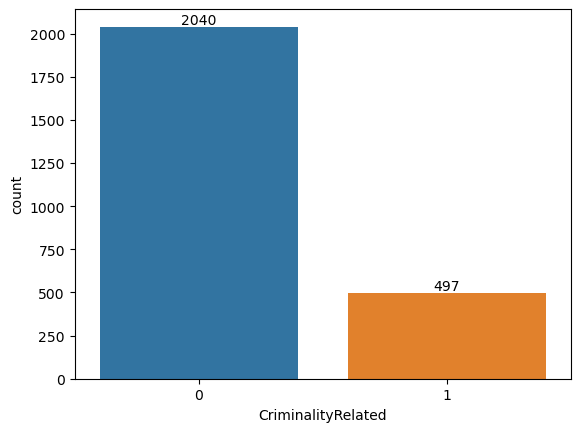

In [37]:
ax = sns.countplot(x=df_final_label['CriminalityRelated'])
ax.bar_label(ax.containers[0])

## PREPROCESSING STEPS

### TOKENIZATION

In [40]:
df_final_label['Tokens'] = df_final_label['Text_clean'].apply(nltk.word_tokenize)

In [41]:
df_final_label['Tokens'].head()

0    [tots, els, casos, estan, resolts, si, be, alg...
1    [hem, activat, patrullatges, preventius, de, p...
2    [continuem, amb, el, dispositiu, de, seguretat...
3    [detenim, cinc, homes, a, miralcamp, per, tres...
4    [dos, agents, que, estan, fent, un, control, a...
Name: Tokens, dtype: object

In [42]:
pd.options.display.max_colwidth = 50

### STOPWORDS

In [43]:
import advertools as adv
stopwords = list(adv.stopwords['catalan'])

In [44]:
# Separate words with '
stopwords_new = []
for word in stopwords:
    if "'" in word:
        separated_words = word.split("'")
        for separated in separated_words:
            stopwords_new.append(separated)
    else:
        stopwords_new.append(word)

In [45]:
# Clean stopwords (accents, uppercases, etc)
clean_stopwords = []
for word in stopwords_new:
    clean_stopwords.append(cleanText(word))

In [46]:
# Remove duplicates
final_stopwords = [*set(clean_stopwords)]

In [47]:
# # Remove stopwords from dataset
# df_final_labeled['Text_stopwords'] = df_final_labeled['Tokens'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
# df_final_labeled['Text_stopwords']

In [48]:
df_final_label['Text_stopwords'] = df_final_label['Tokens'].apply(lambda x: [word for word in x if word not in final_stopwords])  # Eliminación de stop words
df_final_label['Text_stopwords'][239]

['lliurem',
 'universitat',
 'autonoma',
 'barcelona',
 '32.170eur',
 'recollit',
 'cursa',
 'solidaria',
 'laluchadeabril1',
 'diners',
 'destinaran',
 'investigacio',
 'malaltia',
 'rara',
 'spg52',
 'pateix',
 'abril',
 'agraiment',
 'infinit',
 '2.650',
 'persones',
 'participar']

### STEMMING

In [49]:
stemmer_cat = snowballstemmer.stemmer('Catalan')
stemmer_cat.stemWord('mundial')

'mund'

In [50]:
df_final_label['Text_stemming'] = df_final_label['Text_stopwords'].apply(lambda x: [stemmer_cat.stemWord(word) for word in x])

In [51]:
df_final_label['Text_stemming'][239]

['lliur',
 'univer',
 'autonom',
 'barcelon',
 '32.170eur',
 'recoll',
 'curs',
 'solid',
 'laluchadeabril1',
 'din',
 'destin',
 'investigac',
 'malalt',
 'rar',
 'spg52',
 'pat',
 'abr',
 'agra',
 'infin',
 '2.650',
 'person',
 'particip']

In [52]:
# Save labeled dataset
df_final_label.to_csv('df_final_labeled_separed.csv', sep=',', encoding='utf-8')

### TF-IDF AND BAG OF WORDS

In [53]:
vectorizer = TfidfVectorizer()
vectores_tfidf = vectorizer.fit_transform(df_final_label['Text_stemming'].apply(" ".join))
print(vectores_tfidf[:5])

  (0, 1263)	0.1998987495956738
  (0, 2222)	0.24973771654889992
  (0, 4748)	0.243266243587487
  (0, 3924)	0.2573918444865579
  (0, 2137)	0.25213731108910553
  (0, 4086)	0.1826402101851902
  (0, 4519)	0.20284602794883502
  (0, 1397)	0.28938760827532833
  (0, 2497)	0.1677136665443535
  (0, 2935)	0.25213731108910553
  (0, 4079)	0.25213731108910553
  (0, 1801)	0.29585908123674126
  (0, 3906)	0.23271569311793763
  (0, 3138)	0.20601594640126425
  (0, 4736)	0.29585908123674126
  (0, 1122)	0.35139933116084915
  (1, 824)	0.16288444698866442
  (1, 625)	0.10260965508848924
  (1, 60)	0.18038608479110482
  (1, 24)	0.18038608479110482
  (1, 542)	0.17774901640123805
  (1, 173)	0.25762897139413077
  (1, 2182)	0.17774901640123805
  (1, 4999)	0.14056974740604236
  (1, 5694)	0.14136045107067907
  :	:
  (3, 2850)	0.17496675840668058
  (3, 1240)	0.25568999941074977
  (3, 1800)	0.1699002519557743
  (4, 5097)	0.23549251571281166
  (4, 5704)	0.185369230875721
  (4, 1830)	0.17004770200602928
  (4, 4364)	0.24986

## CLASSIFICATION

### TRAIN AND TEST PARTS

In [ ]:
X = vectores_tfidf
y = df_final_label['CriminalityRelated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODELS

In [ ]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
#create a dictionary of variables and models
clfs = {'SVC' : svc, 'LR': lrc, 'RF': rfc}

In [ ]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
pred_scores_word_vectors

### ACCURACY, RECALL, PRECISION AND F1

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
estimator = rf.estimators_[5]

In [ ]:
# EVALUATE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ratio of true positives and true negatives to all positive and negative observations
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Positively predicted labels that are actually correct.
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision: ", precision)

# Model’s ability to correctly predict the positives out of actual positives
recall = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("Recall: ", recall)

# Provides high-level information about the model’s output quality
f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1: ", f1)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Crear el modelo de Random Forest
random_forest = RandomForestClassifier()

# Realizar la validación cruzada
scores = cross_val_score(random_forest, X, y, cv=5)  # cv=5 para 5 pliegues

# Imprimir los resultados de rendimiento en cada pliegue
print("Results:")
for i, score in enumerate(scores):
    print(f"Pliegue {i+1}: {score}")

# Imprimir la media y desviación estándar de los resultados
print("Rendimiento promedio: ", scores.mean())
print("Desviación estándar: ", scores.std())

#### ROC CURVE

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');

## OVERSAMPLING

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_res)

### ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_res, y_res = ada.fit_resample(X_train, y_train)

## CLASSIFICATION AFTER OVERSAMPLING

In [ ]:
# X = vectores_tfidf
# y = df_upsampled['CriminalityRelated']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
#create a dictionary of variables and models
# clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}
clfs = {'SVC' : svc, 'LR': lrc, 'RF': rfc}

In [ ]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_res, y_res)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
pred_scores_word_vectors

### RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)
estimator = rf.estimators_[5]

#### ACCURACY, PRECISION, RECALL AND F1

In [ ]:
# EVALUATE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ratio of true positives and true negatives to all positive and negative observations
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Positively predicted labels that are actually correct.
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision: ", precision)

# Model’s ability to correctly predict the positives out of actual positives
recall = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("Recall: ", recall)

# Provides high-level information about the model’s output quality
f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1: ", f1)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

#### CROSS VALIDATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Crear el modelo de Random Forest
random_forest = RandomForestClassifier()

# Realizar la validación cruzada
scores = cross_val_score(random_forest, X, y, cv=5)  # cv=5 para 5 pliegues

# Imprimir los resultados de rendimiento en cada pliegue
print("SCORES: ", scores)

# Imprimir la media y desviación estándar de los resultados
print("Mean: ", scores.mean())
print("Standard deviation: ", scores.std())

### CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');